## Yelp Project
- Yelp API documentation: https://www.yelp.com/developers/documentation/v2/search_api
- note: http://letstalkdata.com/2014/02/how-to-use-the-yelp-api-in-python/

In [141]:
import rauth
import time
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [105]:
def get_search_parameters(lat,long):
    #See the Yelp API for more details
    params = {}
    params["term"] = "thai"
    params["ll"] = "{},{}".format(str(lat),str(long))
    params["radius_filter"] = "2000"
    params["limit"] = "20"

    return params

In [106]:
def get_results(params):
    #Obtain these from Yelp's manage access page
    consumer_key = "FY3IHON9216l9ySH7sRUXQ"
    consumer_secret = "zkFNTQwzZKsShEe4UX2Lvxglud0"
    token = "dTq6iJc1zKoKHE-5zf7W2C64lqJo5MuO"
    token_secret = "4b_fHLdJJzMlfg84fMPTRG_cK70"

    session = rauth.OAuth1Session(
        consumer_key = consumer_key
        ,consumer_secret = consumer_secret
        ,access_token = token
        ,access_token_secret = token_secret)

    request = session.get("http://api.yelp.com/v2/search",params=params)

    #Transforms the JSON API response into a Python dictionary
    data = request.json()
    session.close()
    return data

In [107]:
def get_business(business_id):
    #Obtain these from Yelp's manage access page
    consumer_key = "FY3IHON9216l9ySH7sRUXQ"
    consumer_secret = "zkFNTQwzZKsShEe4UX2Lvxglud0"
    token = "dTq6iJc1zKoKHE-5zf7W2C64lqJo5MuO"
    token_secret = "4b_fHLdJJzMlfg84fMPTRG_cK70"

    session = rauth.OAuth1Session(
        consumer_key = consumer_key
        ,consumer_secret = consumer_secret
        ,access_token = token
        ,access_token_secret = token_secret)

    request = session.get("http://api.yelp.com/v2/business/"+business_id)

    #Transforms the JSON API response into a Python dictionary
    data = request.json()
    session.close()
    return data

In [108]:
def get_business_id(lat, long):
    params = get_search_parameters(lat,long)
    call=get_results(params)
    
    return call['businesses'][0]['id']

### Main program

In [109]:
#def main():
#location: Ashdown = 42.35870,-71.10121

locations = [(42.35870,-71.10121)]
api_calls = []
for lat,long in locations:
    params = get_search_parameters(lat,long)
    api_calls.append(get_results(params))
    #Be a good internet citizen and rate-limit yourself
    time.sleep(1.0)

In [110]:
params = get_search_parameters(42.35870,-71.10121)
data=get_results(params)

In [203]:
columns = ['name','rate','count','loc_lat']
index=range(0,len(data['businesses']))
df= pd.DataFrame(index=index, columns=columns)

df['name']=[x['id'] for x in data['businesses']]
df['rate']=[x['rating'] for x in data['businesses']]
df['count']=[x['review_count'] for x in data['businesses']]
df['loc_lat']=[x['location']['coordinate']['latitude'] for x in data['businesses']]
df['loc_long']=[x['location']['coordinate']['longitude'] for x in data['businesses']]

df[['name','rate','count','loc_lat','loc_long']].to_csv('loc.csv', index=False)

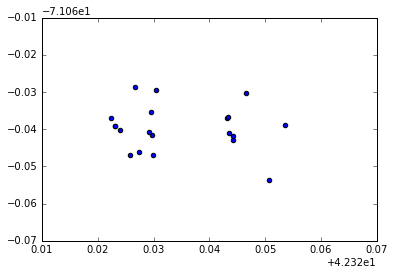

In [138]:
plt.scatter(df['loc_lat'], df['loc_long'])

## Google Map resutl for the Yelp project
https://www.google.com/maps/d/edit?mid=zzbVdtK68qFo.kh35g6a58mDE&usp=sharing